In [ ]:
# Here are the packages we need

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# This command imports our data, which is a log of games played in 2018 downloaded from Retrosheet 
#(you can find the data here: https://www.retrosheet.org/)

import pandas as pd

file_path = r"D:\Sports\Data\Week 1\Retrosheet MLB game log 2018.xlsx"
MLB = pd.read_excel(file_path, engine='openpyxl')



In [ ]:
MLB.head()

In [ ]:
# For the Pythagorean Expectation we need only runs scored and conceded. Of course, we also need the names of the teams.
# and the date will also be useful. We put these into a new dataframe (df) which we call MLB18.
# The variable names are rather lengthy, so to make life easier we can rename columns to give them short names.
# If we want to see what the data looks like, we can just type the name of the df.

MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18

In [ ]:
MLB18 = MLB[['VisitingTeam', 'HomeTeam', 'VisitorRunsScored', 'HomeRunsScore', 'Date']]
MLB18 = MLB18.rename(columns={
    'VisitingTeam': 'Visitor_Team',
    'HomeTeam': 'Home_Team',
    'VisitorRunsScored': 'Visitor_Runs',
    'HomeRunsScore': 'Home_Runs',
    'Date': 'Game_Date'
})
MLB18


In [ ]:
# We will need to know who won the game - which we can tell by who scored the more runs, the home team or the visiting teams
#(there are no ties in baseball)
# The variable 'hwin' is defined here as equaling 1 if the home team scored more runs, and zero otherwise. 
# The variable 'awin' is defined in a similar way for the away team.
# we also create a 'counter' variable = 1 for each row.

MLB18['Home_Win']= np.where(MLB18['Home_Runs']>MLB18['Visitor_Runs'],1,0)
MLB18['Away_Win']= np.where(MLB18['Home_Runs']<MLB18['Visitor_Runs'],1,0)
MLB18['Count']=1
MLB18

In [ ]:
# Since our data refers to games, for each game there are two teams, but what we want is a list of runs scored and conceded
# by each team and its win percentage. 
# To create this we are going to define two dfs, one for home teams and one for away teams, which we can then merge to get 
# the stats for the entire season.
# Here we define a df for home teams. The command is called ".groupby" and we will use this often. We group by home team
# to obtain the sum of wins and runs (scored and conceded) and also the counter variable to show how many games were played 
# (in MLB the teams do not necessarily play the same number of games in the regular season)
# Finally we rename the columns.
 
MLBhome = MLB18.groupby('Home_Team')['Home_Win','Home_Runs','Visitor_Runs','Count'].sum().reset_index()
MLBhome = MLBhome.rename(columns={
    'Home_Team': 'Home_Team_Name',
    'Home_Win': 'Home_Wins',
    'Home_Runs': 'Runs_Scored_At_Home',
    'Visitor_Runs': 'Runs_Conceded_At_Home',
    'Count': 'Home_Games_Played'
})
MLBhome

# Self test - 1 Solution

In [ ]:
# Now we create a similar df for teams playing as visitors - To write this code all you need to do is to copy and paste
# the previous cell and then change any reference to the home team into a reference to the visiting team.

MLBaway = MLB18.groupby('Visitor_Team')['Away_Win','Home_Runs','Visitor_Runs','Count'].sum().reset_index()
MLBaway = MLBaway.rename(columns={
    'Visitor_Team': 'Away_Team_Name',
    'Away_Win': 'Away_Wins',
    'Visitor_Runs': 'Runs_Scored_Away',
    'Home_Runs': 'Runs_Conceded_Away',
    'Count': 'Away_Games_Played'
})
MLBaway


In [ ]:
# We now merge MLBhome and MLBaway so that we have a list of all the clubs with home and away records for the 2018 season
# We will be using pd.merge frequently during the course to combine dfs
# Note that we've called this new df "MLB18", which is name we had already used for earlier df. By doing this we are simply
# overwriting the old MLB18 - which is fine in this case since we don't need the data in the old MLB18 any more.
# If we did want to retain the daat in the old MLB18 df, we should have given this new df a different name. 

MLB18 = pd.merge(MLBhome, MLBaway, left_on='Home_Team_Name', right_on='Away_Team_Name')
MLB18

# Self test - 2 Solution

In [ ]:
MLBhome

In [ ]:
MLBaway

In [ ]:
# Now we create the total wins, games, played, runs scored and run conceded by summing the totals as home team and away team

# Creating the total wins, games played, runs scored, and runs conceded
MLB18['Total_Wins'] = MLB18['Home_Wins'] + MLB18['Away_Wins']
MLB18['Total_Games_Played'] = MLB18['Home_Games_Played'] + MLB18['Away_Games_Played']
MLB18['Total_Runs_Scored'] = MLB18['Runs_Scored_At_Home'] + MLB18['Runs_Scored_Away']
MLB18['Total_Runs_Conceded'] = MLB18['Runs_Conceded_At_Home'] + MLB18['Runs_Conceded_Away']


# Display the updated DataFrame
MLB18.drop(columns=["Away_Team_Name"], axis= 1 , inplace= True)

MLB18.rename( columns= {"Home_Team_Name": "Team_Name"} , inplace= True)

In [53]:
MLB18

,Team_Name,Home_Wins,Runs_Scored_At_Home,Runs_Conceded_At_Home,Home_Games_Played,Away_Wins,Runs_Conceded_Away,Runs_Scored_Away,Away_Games_Played,Total_Wins,Total_Games_Played,Total_Runs_Scored,Total_Runs_Conceded
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647
5,CHA,30,321,409,81,32,439,335,81,62,162,656,848
6,CHN,51,385,349,82,44,296,376,81,95,163,761,645
7,CIN,37,385,418,81,30,401,311,81,67,162,696,819
8,CLE,49,443,334,81,42,314,375,81,91,162,818,648
9,COL,47,445,404,81,44,341,335,82,91,163,780,745


In [54]:
# The last step in preparing the data is to define win percentage and the Pythagorean Expectation.

# Calculate Win Percentage
MLB18['Win_Percentage'] = MLB18['Total_Wins'] / MLB18['Total_Games_Played']

# Calculate Pythagorean Expectation
MLB18['Pythagorean_Expectation'] = (MLB18['Total_Runs_Scored'] ** 2) / ((MLB18['Total_Runs_Scored'] ** 2) + (MLB18['Total_Runs_Conceded'] ** 2))

# Display the updated DataFrame
MLB18

,Team_Name,Home_Wins,Runs_Scored_At_Home,Runs_Conceded_At_Home,Home_Games_Played,Away_Wins,Runs_Conceded_Away,Runs_Scored_Away,Away_Games_Played,Total_Wins,Total_Games_Played,Total_Runs_Scored,Total_Runs_Conceded,Win_Percentage,Pythagorean_Expectation
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722,0.493827,0.499307
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644,0.506173,0.536600
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657,0.555556,0.571662
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892,0.290123,0.327161
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647,0.666667,0.647037
5,CHA,30,321,409,81,32,439,335,81,62,162,656,848,0.382716,0.374388
6,CHN,51,385,349,82,44,296,376,81,95,163,761,645,0.582822,0.581946
7,CIN,37,385,418,81,30,401,311,81,67,162,696,819,0.413580,0.419344
8,CLE,49,443,334,81,42,314,375,81,91,162,818,648,0.561728,0.614423
9,COL,47,445,404,81,44,341,335,82,91,163,780,745,0.558282,0.522939


# Self Test - 3 Solution

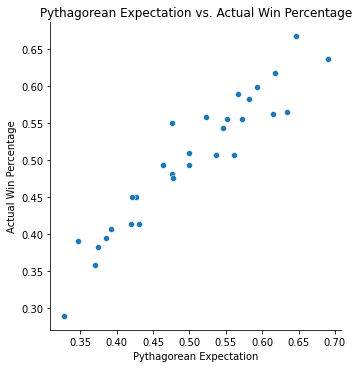

In [56]:
# Having prepared the data, we are now ready to examine it. First, we generate and xy plot use the Seaborn package.
# This illustrates nicely the close correlation between win percentage and the Pythagorean Expectation.

sns.relplot(x = "Pythagorean_Expectation", y = "Win_Percentage", data = MLB18)
plt.title("Pythagorean Expectation vs. Actual Win Percentage")
plt.xlabel("Pythagorean Expectation")
plt.ylabel("Actual Win Percentage")
plt.show()


# Self Test - 4 Solution

In [57]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'Win_Percentage ~ Total_Wins', data=MLB18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Win_Percentage   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.186e+05
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           2.49e-52
Time:                        13:20:09   Log-Likelihood:                 155.33
No. Observations:                  30   AIC:                            -306.7
Df Residuals:                      28   BIC:                            -303.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0025      0.001      1.719      0.097      -0.000       0.006
Total_Wins     0.0061   1.78e-05    344.358      0.000       0.006       0.006
==============================================================================
Omnibus:                        3.923   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.440
Skew:                          -0.456   Prob(JB):                        0.295
Kurtosis:                       4.058   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""